In [1]:
#import gdown
#gdown.download_folder('https://drive.google.com/drive/folders/1r9BARaPl-5odlOwCPE8LZJ1cFWRZGsYO?usp=sharing')

In [2]:
#!curl --remote-name https://raw.githubusercontent.com/aymanmostafa11/Taxi-Ride-Fare-Prediction/main/helpers.py

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from helpers import Model , PreProcessing

In [4]:
RANDOM_STATE = 42

In [5]:
dataPath = 'E:\\Edu\Academic\\Year 3\\Second Term\\ML\\Project\\taxi-rides-classification'

In [6]:
taxiRides = pd.read_csv(dataPath + '\\taxi-rides-classification.csv')
weather = pd.read_csv(dataPath + '\\weather.csv')

In [7]:
print(f"Taxi Rides has {taxiRides.shape[0]} Rows and {taxiRides.shape[1]} Columns")
taxiRides.head()

Taxi Rides has 554456 Rows and 10 Columns


,distance,cab_type,time_stamp,destination,source,surge_multiplier,id,product_id,name,RideCategory
0,0.62,Uber,1.544770e+12,West End,Haymarket Square,1.0,c1b4a572-24b2-484d-aac5-b4f97b790480,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,unknown
1,2.27,Uber,1.543400e+12,Boston University,Beacon Hill,1.0,f9e7e7e6-b309-479b-9f90-bf26a1870c81,997acbb5-e102-41e1-b155-9df7de0a73f2,UberPool,cheap
2,2.00,Lyft,1.544920e+12,Back Bay,Haymarket Square,1.0,154e8438-46f5-4e5f-9872-15cc95e85eed,lyft,Lyft,moderate
3,3.98,Lyft,1.543620e+12,Financial District,Northeastern University,1.0,6bdc30a6-9a80-487b-914e-8d9b82ee4acb,lyft_plus,Lyft XL,expensive
4,1.49,Lyft,1.543580e+12,Back Bay,Northeastern University,1.0,0cb12fe9-cd72-4feb-b341-4a566b2e6643,lyft,Lyft,cheap


In [8]:
print(f"Weather has {weather.shape[0]} Rows and {weather.shape[1]} Columns")
weather.head()

Weather has 6276 Rows and 8 Columns


,temp,location,clouds,pressure,rain,time_stamp,humidity,wind
0,42.42,Back Bay,1.0,1012.14,0.1228,1545003901,0.77,11.25
1,42.43,Beacon Hill,1.0,1012.15,0.1846,1545003901,0.76,11.32
2,42.50,Boston University,1.0,1012.15,0.1089,1545003901,0.76,11.07
3,42.11,Fenway,1.0,1012.13,0.0969,1545003901,0.77,11.09
4,43.13,Financial District,1.0,1012.14,0.1786,1545003901,0.75,11.49


# Data Cleaning

## Taxi Rides

In [9]:
taxiRides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 554456 entries, 0 to 554455
Data columns (total 10 columns):
distance            554456 non-null float64
cab_type            554456 non-null object
time_stamp          554456 non-null float64
destination         554456 non-null object
source              554456 non-null object
surge_multiplier    554456 non-null float64
id                  554456 non-null object
product_id          554456 non-null object
name                554456 non-null object
RideCategory        554456 non-null object
dtypes: float64(3), object(7)
memory usage: 42.3+ MB


## Null

In [10]:
print("Null Values in columns")
taxiRides.isnull().sum()

Null Values in columns


distance            0
cab_type            0
time_stamp          0
destination         0
source              0
surge_multiplier    0
id                  0
product_id          0
name                0
RideCategory        0
dtype: int64

## product_id and name

In [11]:
print(f"Value counts of 'product_id' feature\n")
taxiRides['product_id'].value_counts()

Value counts of 'product_id' feature



55c66225-fbe7-4fd5-9072-eab1ece5e23e    44204
8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a    44135
997acbb5-e102-41e1-b155-9df7de0a73f2    44108
6d318bcc-22a3-4af6-bddd-b409bfce1546    44038
9a0e7b09-b92b-4c41-9779-2ad22b4d779d    44024
6f72dfc5-27f1-42e8-84db-ccc7a75f6969    43983
6c84fd89-3f11-4782-9b50-97c468b19529    43977
lyft_plus                               41142
lyft_lux                                41041
lyft                                    41015
lyft_luxsuv                             40979
lyft_premier                            40969
lyft_line                               40841
Name: product_id, dtype: int64

In [12]:
print(f"Value counts of 'name' feature\n")
taxiRides['name'].value_counts()

Value counts of 'name' feature



UberX           44204
Taxi            44135
UberPool        44108
Black SUV       44038
WAV             44024
UberXL          43983
Black           43977
Lyft XL         41142
Lux Black       41041
Lyft            41015
Lux Black XL    40979
Lux             40969
Shared          40841
Name: name, dtype: int64

product_id and name represent the same feature so we can drop one of them

## Encoding Timestamps to date

In [13]:
weatherDate = pd.to_datetime(weather['time_stamp'], unit='s').apply(lambda x: x.strftime(('%Y-%m-%d')))
taxiRidesDate = pd.to_datetime(taxiRides['time_stamp'], unit='ms').apply(lambda x: x.strftime(('%Y-%m-%d')))
weather['date'] = weatherDate
taxiRides['date'] = taxiRidesDate

In [14]:
taxiRides.head()

,distance,cab_type,time_stamp,destination,source,surge_multiplier,id,product_id,name,RideCategory,date
0,0.62,Uber,1.544770e+12,West End,Haymarket Square,1.0,c1b4a572-24b2-484d-aac5-b4f97b790480,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,unknown,2018-12-14
1,2.27,Uber,1.543400e+12,Boston University,Beacon Hill,1.0,f9e7e7e6-b309-479b-9f90-bf26a1870c81,997acbb5-e102-41e1-b155-9df7de0a73f2,UberPool,cheap,2018-11-28
2,2.00,Lyft,1.544920e+12,Back Bay,Haymarket Square,1.0,154e8438-46f5-4e5f-9872-15cc95e85eed,lyft,Lyft,moderate,2018-12-16
3,3.98,Lyft,1.543620e+12,Financial District,Northeastern University,1.0,6bdc30a6-9a80-487b-914e-8d9b82ee4acb,lyft_plus,Lyft XL,expensive,2018-11-30
4,1.49,Lyft,1.543580e+12,Back Bay,Northeastern University,1.0,0cb12fe9-cd72-4feb-b341-4a566b2e6643,lyft,Lyft,cheap,2018-11-30


In [15]:
weather.head()

,temp,location,clouds,pressure,rain,time_stamp,humidity,wind,date
0,42.42,Back Bay,1.0,1012.14,0.1228,1545003901,0.77,11.25,2018-12-16
1,42.43,Beacon Hill,1.0,1012.15,0.1846,1545003901,0.76,11.32,2018-12-16
2,42.50,Boston University,1.0,1012.15,0.1089,1545003901,0.76,11.07,2018-12-16
3,42.11,Fenway,1.0,1012.13,0.0969,1545003901,0.77,11.09,2018-12-16
4,43.13,Financial District,1.0,1012.14,0.1786,1545003901,0.75,11.49,2018-12-16


In [16]:
taxiRides['date'].value_counts()

2018-11-27    63256
2018-11-29    53128
2018-11-28    52087
2018-12-14    37608
2018-11-30    37608
2018-12-02    37547
2018-12-17    37540
2018-12-16    37423
2018-12-03    37409
2018-12-01    33387
2018-12-15    33255
2018-12-13    30590
2018-12-18    27281
2018-11-26    24021
2018-12-04     8750
2018-12-10     3566
Name: date, dtype: int64

In [17]:
weather['date'].value_counts()

2018-11-28    948
2018-11-26    852
2018-11-29    768
2018-11-27    684
2018-12-01    324
2018-11-30    300
2018-12-17    288
2018-12-03    288
2018-12-02    288
2018-12-16    288
2018-12-14    288
2018-12-15    288
2018-12-13    276
2018-12-18    228
2018-12-10     72
2018-12-04     72
2018-12-09     24
Name: date, dtype: int64

In [18]:
## Joining Dataframes based on date

# taxiRides.drop(['time_stamp'],axis = 1, inplace = True)
# weather.drop(['time_stamp'],axis = 1, inplace = True)
#
# mergedData = pd.merge(taxiRides,weather.drop_duplicates(subset=['date', 'location']), how = 'left', left_on=['date', 'source'], right_on=['date', 'location'])

In [19]:
# mergedData.isnull().sum()

## Rain Feature

Rows with null rain value statistics
Rows with non-null rain value statistics
Values of 0 in the rain feature 0


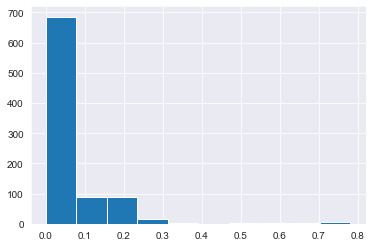

In [20]:
weather['rain'].isnull().sum() / weather['rain'].shape[0]
weather['rain'].hist()
#Does null values of rain revolve around certain values?
print("Rows with null rain value statistics")
weather[weather['rain'].isnull()].describe()

print("Rows with non-null rain value statistics")
weather[weather['rain'].notna()].describe()

weather['rain'].value_counts()

print(f"Values of 0 in the rain feature {(weather['rain'] == 0).sum()}")
#Rain feature nulls could indicate no rain


# Data Visualization

In [21]:
# plt.figure(figsize = (8, 8))
# plt.xticks(rotation = 60)
# plt.yticks(rotation = 60)
# plt.title('Correlation of data features')
# sns.heatmap(taxiRides.corr(), annot = True)
# plt.show()

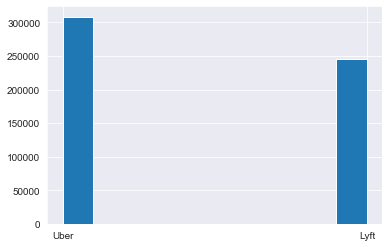

In [22]:
taxiRides['cab_type'].hist()
plt.show()

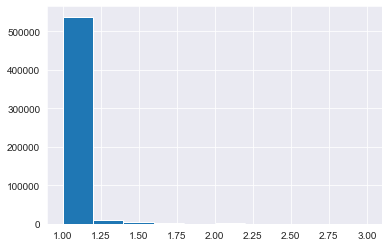

In [23]:
taxiRides['surge_multiplier'].hist()

# Preprocessing

In [24]:
taxiRides.head()

,distance,cab_type,time_stamp,destination,source,surge_multiplier,id,product_id,name,RideCategory,date
0,0.62,Uber,1.544770e+12,West End,Haymarket Square,1.0,c1b4a572-24b2-484d-aac5-b4f97b790480,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,unknown,2018-12-14
1,2.27,Uber,1.543400e+12,Boston University,Beacon Hill,1.0,f9e7e7e6-b309-479b-9f90-bf26a1870c81,997acbb5-e102-41e1-b155-9df7de0a73f2,UberPool,cheap,2018-11-28
2,2.00,Lyft,1.544920e+12,Back Bay,Haymarket Square,1.0,154e8438-46f5-4e5f-9872-15cc95e85eed,lyft,Lyft,moderate,2018-12-16
3,3.98,Lyft,1.543620e+12,Financial District,Northeastern University,1.0,6bdc30a6-9a80-487b-914e-8d9b82ee4acb,lyft_plus,Lyft XL,expensive,2018-11-30
4,1.49,Lyft,1.543580e+12,Back Bay,Northeastern University,1.0,0cb12fe9-cd72-4feb-b341-4a566b2e6643,lyft,Lyft,cheap,2018-11-30


In [25]:
preProcessing = PreProcessing()

In [26]:
columnsToDrop = ['time_stamp', 'id', 'date', 'product_id']

In [27]:
features = taxiRides.drop(columnsToDrop,axis = 1)

In [28]:
features.head()

,distance,cab_type,destination,source,surge_multiplier,name,RideCategory
0,0.62,Uber,West End,Haymarket Square,1.0,Taxi,unknown
1,2.27,Uber,Boston University,Beacon Hill,1.0,UberPool,cheap
2,2.00,Lyft,Back Bay,Haymarket Square,1.0,Lyft,moderate
3,3.98,Lyft,Financial District,Northeastern University,1.0,Lyft XL,expensive
4,1.49,Lyft,Back Bay,Northeastern University,1.0,Lyft,cheap


## Encoding

###  <i>name</i> Feature

In [29]:
preProcessing.encode_name(features['name'])

### Other Features

In [30]:
nonIntegerColumns = [col for col in features.columns if features[col].dtypes == object]
print(f"Non Integer Columns : {nonIntegerColumns}")

Non Integer Columns : ['cab_type', 'destination', 'source', 'RideCategory']


In [31]:
preProcessing.encode(features,nonIntegerColumns)

In [32]:
features.head()

,distance,cab_type,destination,source,surge_multiplier,name,RideCategory
0,0.62,1,11,5,1.0,1,3
1,2.27,1,2,1,1.0,1,0
2,2.00,0,0,5,1.0,1,2
3,3.98,0,4,8,1.0,2,1
4,1.49,0,0,8,1.0,1,0


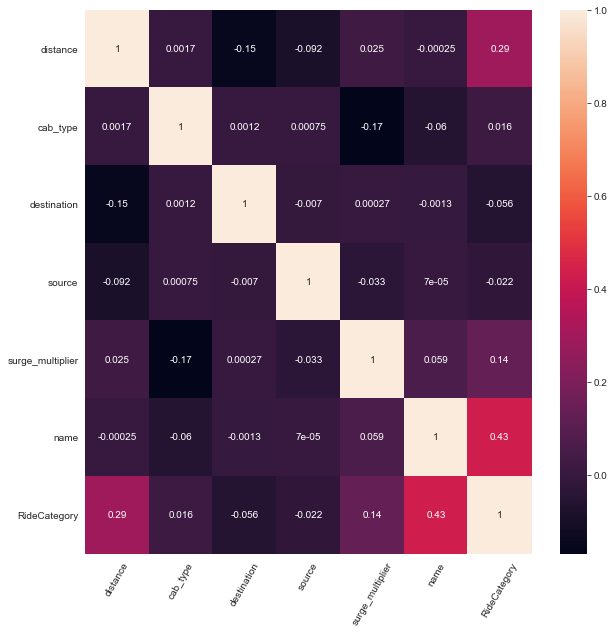

In [33]:
plt.figure(figsize = (10, 10))

ax = sns.heatmap(features.corr(), annot = True)
ax.tick_params(axis = 'x', rotation = 60)
ax.tick_params(axis = 'y', rotation = 0)
# these two lines are meant to fix a bug in matplotlib's current version
# where the graph top and bot rows are cut in half (I copied them from stackoverflow)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

plt.show()

# Model

In [34]:
dataFeatures = features.drop(['RideCategory'],axis=1)
dataLabel = features['RideCategory']

In [35]:
dataFeatures.head()

,distance,cab_type,destination,source,surge_multiplier,name
0,0.62,1,11,5,1.0,1
1,2.27,1,2,1,1.0,1
2,2.00,0,0,5,1.0,1
3,3.98,0,4,8,1.0,2
4,1.49,0,0,8,1.0,1


In [36]:
model = Model()

In [37]:
splitData = model.splitData(dataFeatures,dataLabel)

### Linear Logistic

In [38]:
# lr = linear_model.LogisticRegression(solver = 'lbfgs', multi_class = 'multinomial', random_state=RANDOM_STATE)
# lr.fit(splitData['trainFeatures'], splitData['trainLabel'])
# print(lr.score(splitData['trainFeatures'], splitData['trainLabel']))
# metrics.f1_score(splitData['testLabel'], lr.predict(splitData['testFeatures']),average='micro')

### Polynomial Logistic

In [39]:
# polyDegree = 4

In [40]:
# polyFeaturesTrain  = model.changeDegreeOf(splitData['trainFeatures'], polyDegree)
# polyFeaturesValidation = model.changeDegreeOf(splitData['testFeatures'], polyDegree)

In [41]:
# lr = linear_model.LogisticRegression(solver = 'lbfgs', multi_class = 'multinomial', random_state=RANDOM_STATE)
# lr.fit(polyFeaturesTrain, splitData['trainLabel'])

In [42]:
# print(lr.score(polyFeaturesTrain, splitData['trainLabel']))
# metrics.f1_score(splitData['testLabel'], lr.predict(polyFeaturesValidation),average='micro')

### Decision Tree

In [43]:
# tree = DecisionTreeClassifier(criterion='entropy', random_state=RANDOM_STATE)
# tree.fit(splitData['trainFeatures'], splitData['trainLabel'])
# print(tree.score(splitData['trainFeatures'], splitData['trainLabel']))
# metrics.f1_score(splitData['testLabel'], tree.predict(splitData['testFeatures']),average='micro')

### Random Forest

In [44]:
# forest = RandomForestClassifier(n_estimators=100, random_state=RANDOM_STATE)
# forest.fit(splitData['trainFeatures'], splitData['trainLabel'])
# print(forest.score(splitData['trainFeatures'], splitData['trainLabel']))
# metrics.f1_score(splitData['testLabel'], forest.predict(splitData['testFeatures']),average='micro')

### SVM

In [45]:
# svm = SVC()
# svm.fit(splitData['trainFeatures'], splitData['trainLabel'], random_state=RANDOM_STATE)
# print(svm.score(splitData['trainFeatures'], splitData['trainLabel']))
# metrics.f1_score(splitData['testLabel'], svm.predict(splitData['testFeatures']),average='micro')